In [44]:
import numpy as np
import pandas as pd

# 1. Define the matrix A2
A2 = np.array([
    [2,    1,    0, 1],
    [3,    2,    0, 2],
    [1.99, 1.01, 0, 1],
    [0.5,  0.251, 0, 0.5],
    [0,    0,    1, 1]
])

print("Matrix A2:")
print(pd.DataFrame(A2, index=[f'Row{i+1}' for i in range(A2.shape[0])],
                       columns=[f'Col{j+1}' for j in range(A2.shape[1])]))

# 2. Perform Singular Value Decomposition
U, S, Vt = np.linalg.svd(A2, full_matrices=True)

print("\nSingular Value Decomposition of A2:")

print("\nU matrix:")
print(pd.DataFrame(U, index=[f'Row{i+1}' for i in range(U.shape[0])],
                       columns=[f'U{i+1}' for i in range(U.shape[1])]))

print("\nSingular values (Sigma):")
print(S)

print("\nV^T matrix:")
print(pd.DataFrame(Vt, index=[f'V{i+1}^T' for i in range(Vt.shape[0])],
                       columns=[f'Col{j+1}' for j in range(Vt.shape[1])]))

# 3. Reconstruct A2 from SVD components
Sigma = np.zeros((U.shape[1], Vt.shape[0]))
np.fill_diagonal(Sigma, S)

A2_reconstructed = U @ Sigma @ Vt

print("\nReconstructed Matrix A2 from SVD components:")
print(pd.DataFrame(A2_reconstructed, index=[f'Row{i+1}' for i in range(A2_reconstructed.shape[0])],
                                       columns=[f'Col{j+1}' for j in range(A2_reconstructed.shape[1])]))



Matrix A2:
      Col1   Col2  Col3  Col4
Row1  2.00  1.000   0.0   1.0
Row2  3.00  2.000   0.0   2.0
Row3  1.99  1.010   0.0   1.0
Row4  0.50  0.251   0.0   0.5
Row5  0.00  0.000   1.0   1.0

Singular Value Decomposition of A2:

U matrix:
            U1        U2        U3        U4            U5
Row1 -0.448134  0.110832 -0.553657 -0.037747  6.920484e-01
Row2 -0.756905  0.000820  0.627573  0.181042  2.168623e-02
Row3 -0.447568  0.109739 -0.517501  0.008550 -7.209441e-01
Row4 -0.133793 -0.082772  0.122313 -0.979515 -2.895358e-02
Row5 -0.089739 -0.984287 -0.129802  0.079224 -8.326673e-17

Singular values (Sigma):
[5.44018303 1.34769775 0.33376624 0.14113975]

V^T matrix:
          Col1      Col2      Col3      Col4
V1^T -0.758162 -0.449906 -0.016496 -0.471702
V2^T  0.297631  0.150280 -0.730347 -0.596175
V3^T -0.579047  0.627724 -0.388901  0.345577
V4^T -0.036207  0.617222  0.561317 -0.550135

Reconstructed Matrix A2 from SVD components:
              Col1          Col2          Col3  Col

In [5]:
# 4. Compute Covariance Matrix between Rows (COVROW)
COVROW = np.cov(A2, rowvar=True, bias=False)

print("\nCovariance Matrix between Rows (COVROW):")
print(pd.DataFrame(COVROW, index=[f'Row{i+1}' for i in range(COVROW.shape[0])],
                         columns=[f'Row{j+1}' for j in range(COVROW.shape[1])]))

# 5. Spectral Decomposition of COVROW
eigenvalues_row, eigenvectors_row = np.linalg.eigh(COVROW)
sorted_indices_row = np.argsort(eigenvalues_row)[::-1]
eigenvalues_row = eigenvalues_row[sorted_indices_row]
eigenvectors_row = eigenvectors_row[:, sorted_indices_row]

print("\nSpectral Decomposition of COVROW:")

print("\nEigenvalues:")
print(eigenvalues_row)

print("\nEigenvectors (columns correspond to eigenvalues):")
print(pd.DataFrame(eigenvectors_row, index=[f'Row{i+1}' for i in range(eigenvectors_row.shape[0])],
                       columns=[f'Eigenvec{j+1}' for j in range(eigenvectors_row.shape[1])]))





Covariance Matrix between Rows (COVROW):
          Row1      Row2      Row3      Row4      Row5
Row1  0.666667  1.000000  0.663333  0.166667 -0.333333
Row2  1.000000  1.583333  0.996667  0.270917 -0.500000
Row3  0.663333  0.996667  0.660067  0.165837 -0.333333
Row4  0.166667  0.270917  0.165837  0.057250 -0.041833
Row5 -0.333333 -0.500000 -0.333333 -0.041833  0.333333

Spectral Decomposition of COVROW:

Eigenvalues:
[ 3.08895114e+00  1.74568720e-01  3.71303908e-02  2.53441483e-17
 -2.53441483e-17]

Eigenvectors (columns correspond to eigenvalues):
      Eigenvec1  Eigenvec2  Eigenvec3  Eigenvec4  Eigenvec5
Row1  -0.460437  -0.050201   0.553170  -0.489633   0.489633
Row2  -0.710875  -0.210194  -0.627908  -0.177035  -0.157684
Row3  -0.458657  -0.043068   0.517218   0.511419  -0.508641
Row4  -0.117265  -0.284944  -0.127169   0.664570   0.668754
Row5   0.241945  -0.932872   0.126677  -0.160364  -0.171606


In [34]:
import numpy as np

A = np.array([
    [1, 1, 0, 0], 
    [1, 1, 1, 0], 
    [1, 1, 0, -2]
])

COVCOL1 = np.cov(A, rowvar=False, bias=False)

print("\nCovariance Matrix between Columns (COVCOL):")
print(pd.DataFrame(COVCOL1, index=[f'Col{i+1}' for i in range(COVCOL1.shape[0])],
                         columns=[f'Col{j+1}' for j in range(COVCOL1.shape[1])]))

eigenvalues_col, eigenvectors_col = np.linalg.eig(COVCOL1)
sorted_indices_col = np.argsort(eigenvalues_col)[::-1]

# print the eigenvalues and eigenvectors
print("\nEigenvalues:")
print(eigenvalues_col)



Covariance Matrix between Columns (COVCOL):
      Col1  Col2      Col3      Col4
Col1   0.0   0.0  0.000000  0.000000
Col2   0.0   0.0  0.000000  0.000000
Col3   0.0   0.0  0.333333  0.333333
Col4   0.0   0.0  0.333333  1.333333

Eigenvalues:
[0.23240812 1.43425855 0.         0.        ]


In [6]:
# 6. Compute Covariance Matrix between Columns (COVCOL)
COVCOL = np.cov(A2, rowvar=False, bias=False)

print("\nCovariance Matrix between Columns (COVCOL):")
print(pd.DataFrame(COVCOL, index=[f'Col{i+1}' for i in range(COVCOL.shape[0])],
                         columns=[f'Col{j+1}' for j in range(COVCOL.shape[1])]))

# 7. Spectral Decomposition of COVCOL
eigenvalues_col, eigenvectors_col = np.linalg.eigh(COVCOL)
sorted_indices_col = np.argsort(eigenvalues_col)[::-1]
eigenvalues_col = eigenvalues_col[sorted_indices_col]
eigenvectors_col = eigenvectors_col[:, sorted_indices_col]

print("\nSpectral Decomposition of COVCOL:")

print("\nEigenvalues:")
print(eigenvalues_col)

print("\nEigenvectors (columns correspond to eigenvalues):")
print(pd.DataFrame(eigenvectors_col, index=[f'Col{i+1}' for i in range(eigenvectors_col.shape[0])],
                       columns=[f'Eigenvec{j+1}' for j in range(eigenvectors_col.shape[1])]))

# 8. Function to Compare Two Sets of Eigenvectors Up to Sign



Covariance Matrix between Columns (COVCOL):
          Col1      Col2     Col3     Col4
Col1  1.497520  0.938106 -0.37450  0.50025
Col2  0.938106  0.612969 -0.21305  0.36210
Col3 -0.374500 -0.213050  0.20000 -0.02500
Col4  0.500250  0.362100 -0.02500  0.30000

Spectral Decomposition of COVCOL:

Eigenvalues:
[2.36494864e+00 2.24058493e-01 2.14713546e-02 1.07120438e-05]

Eigenvectors (columns correspond to eigenvalues):
      Eigenvec1  Eigenvec2  Eigenvec3  Eigenvec4
Col1  -0.792377  -0.163922  -0.556075   0.189865
Col2  -0.505886   0.128895   0.431705  -0.735593
Col3   0.190119   0.690569  -0.597544  -0.360431
Col4  -0.282971   0.692553   0.383866   0.541243

--- Comparison between U (from SVD) and Eigenvectors of COVROW ---
U column 1 is Different to Eigenvector 1 of COVROW.
U column 2 is Different to Eigenvector 2 of COVROW.
U column 3 is Different to Eigenvector 3 of COVROW.
U column 4 is Different to Eigenvector 4 of COVROW.
U column 5 is Different to Eigenvector 5 of COVROW.

--- 

In [7]:
def compare_eigenvectors(matrix1, matrix2, tolerance=1e-6):
    """
    Compare two matrices of eigenvectors up to sign.
    
    Parameters:
    - matrix1: First matrix (numpy.ndarray), shape (n, m)
    - matrix2: Second matrix (numpy.ndarray), shape (n, m)
    - tolerance: Tolerance for comparison
    
    Returns:
    - List of tuples indicating if each pair matches (with possible sign flip)
    """
    n, m = matrix1.shape
    matches = []
    for i in range(m):
        vec1 = matrix1[:, i]
        vec2 = matrix2[:, i]
        
        # Normalize vectors to ensure unit length
        vec1_norm = vec1 / np.linalg.norm(vec1)
        vec2_norm = vec2 / np.linalg.norm(vec2)
        
        # Check if vectors are the same or negatives
        if np.allclose(vec1_norm, vec2_norm, atol=tolerance):
            matches.append((i+1, "Same"))
        elif np.allclose(vec1_norm, -vec2_norm, atol=tolerance):
            matches.append((i+1, "Opposite"))
        else:
            matches.append((i+1, "Different"))
    return matches

# 9. Check if U from SVD is the same as eigenvectors of COVROW
print("\n--- Comparison between U (from SVD) and Eigenvectors of COVROW ---")
comparison_U = compare_eigenvectors(U, eigenvectors_row)
for idx, status in comparison_U:
    print(f"U column {idx} is {status} to Eigenvector {idx} of COVROW.")

# 10. Check if V from SVD is the same as eigenvectors of COVCOL
print("\n--- Comparison between V (from SVD) and Eigenvectors of COVCOL ---")
V = Vt.T  # V from SVD is the transpose of Vt
comparison_V = compare_eigenvectors(V, eigenvectors_col)
for idx, status in comparison_V:
    print(f"V column {idx} is {status} to Eigenvector {idx} of COVCOL.")


--- Comparison between U (from SVD) and Eigenvectors of COVROW ---
U column 1 is Different to Eigenvector 1 of COVROW.
U column 2 is Different to Eigenvector 2 of COVROW.
U column 3 is Different to Eigenvector 3 of COVROW.
U column 4 is Different to Eigenvector 4 of COVROW.
U column 5 is Different to Eigenvector 5 of COVROW.

--- Comparison between V (from SVD) and Eigenvectors of COVCOL ---
V column 1 is Different to Eigenvector 1 of COVCOL.
V column 2 is Different to Eigenvector 2 of COVCOL.
V column 3 is Different to Eigenvector 3 of COVCOL.
V column 4 is Different to Eigenvector 4 of COVCOL.


In [23]:
# Take te first row of A2 matrix
row = A2[0,:]
row2 = A2[1,:]
# calculate the variance of the row
variance = np.var(row, ddof=1)
print(f"\nVariance of the first row of A2: {variance}")
# covariance between the first and second row
covariance = np.cov(row, row2, bias=False)
print(f"Covariance between the first and second row of A2: {covariance}")


Variance of the first row of A2: 0.6666666666666666
Covariance between the first and second row of A2: [[0.66666667 1.        ]
 [1.         1.58333333]]


Matrix A:
[[1.  1.  0.  0.  1.5]
 [1.  1.  0.  2.  0. ]
 [1.  1.  0.  0.  2. ]
 [1.  1.  2.  2.  2. ]]

Matrix U:
[[ 0.35757154  0.47036932  0.28143659  0.75610102]
 [ 0.36360358 -0.58385809  0.7217436  -0.07738439]
 [ 0.4210896   0.6003679   0.20399442 -0.64855856]
 [ 0.75007905 -0.27824597 -0.59855317  0.04116673]]

Singular Values (S):
[4.76029861 2.27850537 1.53924293 0.16941567]

Matrix V^T:
[[ 0.39752627  0.39752627  0.3151395   0.46790452  0.60472984]
 [ 0.0915658   0.0915658  -0.24423552 -0.75672769  0.59240495]
 [ 0.39540311  0.39540311 -0.77772411  0.16006626 -0.23840462]
 [ 0.42100469  0.42100469  0.48598489 -0.42755976 -0.47594268]]

Reconstructed Matrix A:
[[ 1.00000000e+00  1.00000000e+00  1.13974622e-16  1.84822447e-17
   1.50000000e+00]
 [ 1.00000000e+00  1.00000000e+00 -4.63172550e-16  2.00000000e+00
  -3.95377742e-16]
 [ 1.00000000e+00  1.00000000e+00  9.35899009e-18 -4.87938674e-16
   2.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  2.00000000e+00  2.00000000e+00
 

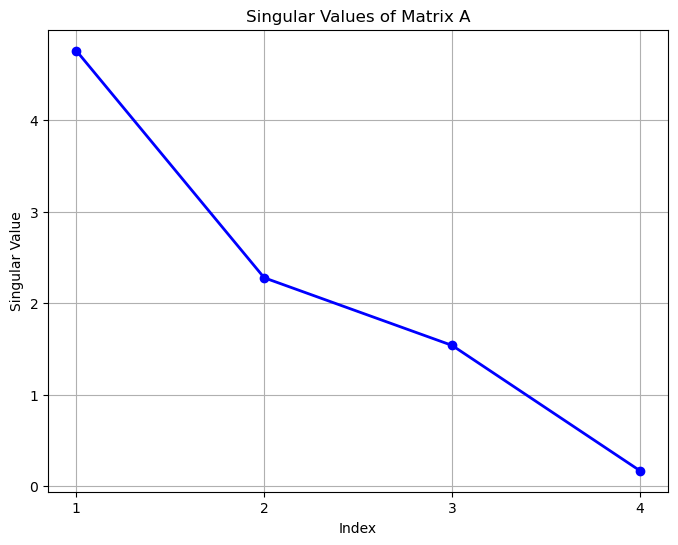

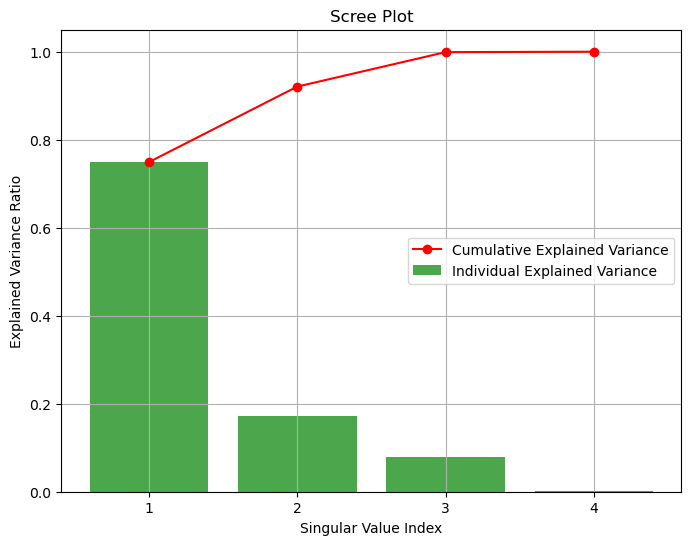

In [41]:
import numpy as np
import matplotlib.pyplot as plt
 
# 1. Define matrix A
A = np.array([
    [1, 1, 0, 0, 1.5],
    [1, 1, 0, 2, 0],
    [1, 1, 0, 0, 2],
    [1, 1, 2, 2, 2]
])
 
print("Matrix A:")
print(A)

A_extended = A
 
# 2. Perform SVD
U, S, Vt = np.linalg.svd(A_extended, full_matrices=False)
 
print("\nMatrix U:")
print(U)
 
print("\nSingular Values (S):")
print(S)
 
print("\nMatrix V^T:")
print(Vt)
 
# 3. Reconstruct matrix A
Sigma = np.diag(S)
A_reconstructed = np.dot(U, np.dot(Sigma, Vt))
 
print("\nReconstructed Matrix A:")
print(A_reconstructed)
 
# 4. Calculate reconstruction error
reconstruction_error = np.linalg.norm(A - A_reconstructed, ord='fro')
print("\nReconstruction Error (Frobenius Norm):")
print(reconstruction_error)
 
# 5. Plot singular values
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(S)+1), S, 'o-', linewidth=2, color='blue')
plt.title('Singular Values of Matrix A')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.xticks(range(1, len(S)+1))
plt.show()
 
# 6. Plot Scree Plot
explained_variance_ratio = (S ** 2) / np.sum(S ** 2)
 
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(S)+1), explained_variance_ratio, alpha=0.7, color='green', label='Individual Explained Variance')
plt.plot(range(1, len(S)+1), np.cumsum(explained_variance_ratio), marker='o', color='red', label='Cumulative Explained Variance')
plt.title('Scree Plot')
plt.xlabel('Singular Value Index')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(S)+1))
plt.legend(loc='best')
plt.grid(True)
plt.show()
